For discrete variable:
$$ D_{KL}(p || q) = \sum_{i}p(x_i)(logp(x_i) - logq(x_i)) = \sum_{i}p(x_i)(log\frac{p(x_i)}{q(x_i)})$$

For continuous variable:
$$ D_{KL}(p || q) = \int p(x)(logp(x) - logq(x)) dx = \int p(x)(log\frac{p(x)}{q(x)}) dx $$

**Reference**:
- [1](https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained)
- [2](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

In [39]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### Generate random distribution

In [21]:
def sample_gen(n=1000):
    samples = []
    for _ in range(n):
        if np.random.uniform() <= 0.5:
            x = np.random.uniform(-2, 2)
        else:
            x = np.random.normal(1, 1)
        samples.append(x)
    return samples

/Users/jeremy.zhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


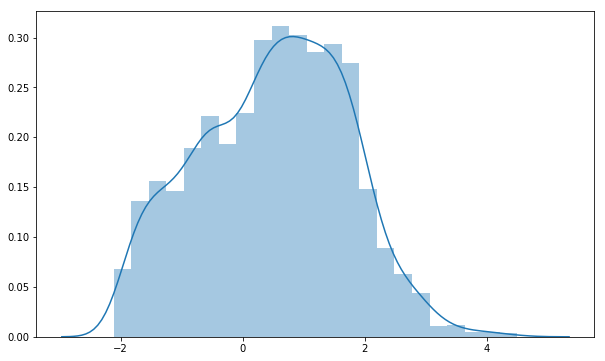

In [25]:
samples = sample_gen(n=2000)
plt.figure(figsize=[10, 6])
sns.distplot(samples)

<function matplotlib.pyplot.legend(*args, **kwargs)>

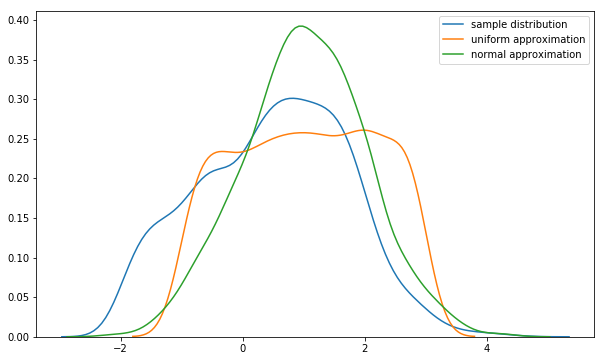

In [49]:
n = 2000
uni_samples = np.random.uniform(-1, 3, n)
norm_samples = np.random.normal(1, 1, n)

plt.figure(figsize=[10, 6])

sns.distplot(samples, hist=False, label="sample distribution")
sns.distplot(uni_samples, hist=False, label="uniform approximation")
sns.distplot(norm_samples, hist=False, label="normal approximation")

plt.legend

### Limit range to `[-1, 3]` 

In [103]:
lower, upper = min(samples), max(samples)

space = np.linspace(lower, upper, 20)
space

array([-2.11403038, -1.76619909, -1.41836779, -1.0705365 , -0.72270521,
       -0.37487392, -0.02704263,  0.32078866,  0.66861996,  1.01645125,
        1.36428254,  1.71211383,  2.05994512,  2.40777641,  2.75560771,
        3.103439  ,  3.45127029,  3.79910158,  4.14693287,  4.49476416])

In [67]:
dist_uni = stats.norm(1, 1)

In [68]:
np.sum([1/2000*(np.log2((1/2000)/dist_uni.pdf(s))) for s in samples])

-8.379093586553296

In [69]:
np.sum([1/2000*(np.log2((1/2000)/(1/6))) for s in samples])

-8.380821783940933

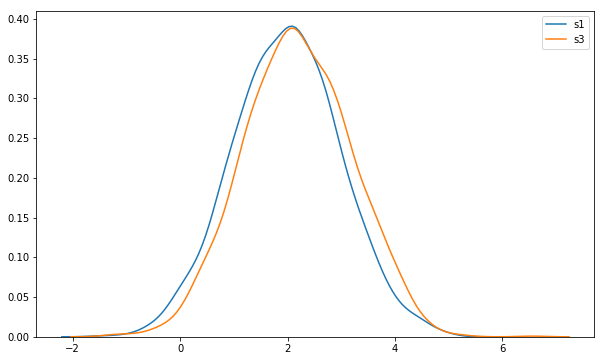

In [104]:
s1 = np.random.normal(2, 1, 2000)
s2 = np.random.normal(2.2, 1, 2000)

plt.figure(figsize=[10, 6])

sns.distplot(s1, hist=False, label="s1")
sns.distplot(s2, hist=False, label="s2")

In [119]:
dist_s1 = stats.norm(2, 1)
dist_s2 = stats.norm(2.2, 1)

KL = 0
for i in range(1000):
    xi = np.random.normal(2, 1)
    pxi = dist_s1.pdf(xi)
    qxi = dist_s2.pdf(xi)
    
    kli = xi*np.log2(pxi/qxi)
    KL += kli
KL/1000

-0.24610114352357795